In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys
import math
sys.path.append('/home/eduardo/PycharmProjects/treemap-analysis/code')

import Parser
import SpatialMetrics
import TemporalMetrics

In [44]:
dataset_id = 'poly'

## Let's see the distributions of delta_data and delta_vis for this dataset.
We will consider delta_vis observations from all techniques. 

In [45]:
technique_list = Parser.list_techniques()

delta_vis = np.array([])
delta_data = np.array([])

for i, technique in enumerate(technique_list):
    history = Parser.parse_rectangles(technique, dataset_id)
    for i in range(1, len(history)):
        df = TemporalMetrics.delta_vis(history[i - 1], history[i])
        df = pd.merge(df, TemporalMetrics.delta_data_by_area(history[i - 1], history[i]), left_index=True, right_index=True)
        df = pd.merge(df, TemporalMetrics.relative_weight(history[i - 1], history[i]), left_index=True, right_index=True)
        
        delta_vis = np.append(delta_vis, df['delta_vis'].values)
        delta_data = np.append(delta_data, df['delta_data'].values)

In [46]:
print ("Number of observations: " + str(len(delta_data)))

Number of observations: 217800


Let's plot the distribution of delta_data and delta_vis over [0, 1] and [0, 0.01] range.

In [47]:
# fig = plt.figure()
# bins = np.histogram(np.hstack((delta_vis,delta_data)), bins=50)[1]
# plt.hist(delta_data,bins,alpha=0.3,label='delta_data',histtype='stepfilled');
# plt.hist(delta_vis,bins,alpha=0.3,label='delta_vis',histtype='stepfilled');
# plt.legend()

In [48]:
# fig = plt.figure()
# bins = np.histogram(np.hstack((delta_vis,delta_data)), bins=3000)[1]
# plt.hist(delta_data,bins,alpha=0.3,label='delta_data',histtype='stepfilled');
# plt.hist(delta_vis,bins,alpha=0.3,label='delta_vis',histtype='stepfilled');

# plt.xlim([0,0.01])
# plt.legend()

Delta_data (for this dataset) is spread over a much more compact range than delta_vis.
Let's follow Bettina's suggestion and multiply delta_data by a constant K to bring its distribution closer to the distribution of delta_vis.

We don't yet know what a good K is. A decent guess would be to take the mean of delta_vis and divide it by the mean of delta_data.

For this dataset (and techniques we are looking at), K = 92.72. 

In [49]:
# np.mean(delta_vis)

In [50]:
# np.mean(delta_data)

## We are forcing K = 5

In [51]:
# K = np.mean(delta_vis) / np.mean(delta_data)
K = 1

The normalization is done is 2 steps:
1. Scale delta_data by K
2. Clip (clamp) delta_data range to [0,1]

In [52]:
# delta_data = np.multiply(delta_data, K)
# stats.describe(delta_data)

In [53]:
# delta_data = np.clip(delta_data, 0, 1)
# stats.describe(delta_data)

In [54]:
# fig = plt.figure()
# bins=np.histogram(np.hstack((delta_vis,delta_data)), bins=50)[1]
# plt.hist(delta_data,bins,alpha=0.3,label='delta_data',histtype='stepfilled');
# plt.hist(delta_vis,bins,alpha=0.3,label='delta_vis',histtype='stepfilled');
# plt.legend()

Now the two distributions look much similar.
And only 0.4% of observations had to be clamped to 1.

In [55]:
# len(np.where(delta_data == 1.0)[0]) / len(delta_data) 

Here is plot with the two histograms and a scatter plot in the middle linking the two variables.

In [56]:
# from matplotlib.gridspec import GridSpec

# fig = plt.figure()

# gs = GridSpec(4,4)

# ax_joint = fig.add_subplot(gs[1:4,0:3])
# ax_marg_x = fig.add_subplot(gs[0,0:3])
# ax_marg_y = fig.add_subplot(gs[1:4,3])

# bins = np.histogram(np.hstack((delta_vis,delta_data)), bins=50)[1]

# ax_joint.scatter(delta_data, delta_vis, alpha=0.01)
# ax_marg_x.hist(delta_data, bins)
# ax_marg_y.hist(delta_vis, bins, orientation="horizontal")

# # Turn off tick labels on marginals
# plt.setp(ax_marg_x.get_xticklabels(), visible=False)
# plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# # Set limits
# ax_joint.set_xlim([0,1])
# ax_joint.set_ylim([0,1])
# ax_marg_x.set_xlim([0,1])
# ax_marg_y.set_ylim([0,1])

# # Set labels on joint
# ax_joint.set_xlabel('Delta data')
# ax_joint.set_ylabel('Delta vis')

# # Set labels on marginals
# ax_marg_y.set_xlabel('Delta data hist')
# ax_marg_x.set_ylabel('Delta vis hist')

In [57]:
# Just defining the styling of the plot, don't mind this
def styleBoxplot(bp, ax, n_revisions):
    
    def get_ax_size(ax):
        bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        width, height = bbox.width, bbox.height
        width *= fig.dpi
        height *= fig.dpi
        return width, height
    
    for box in bp['boxes']:
        # change outline color
        box.set(color='#1b9e77', linewidth=0)
        # change fill color
        box.set(facecolor='#1b9e77')
        box.set_zorder(10)
    for i, median in enumerate(bp['medians']):
        median.set(color='#1445FF', linewidth=2, ms=(get_ax_size(ax)[0])/(n_revisions))
        median.set_zorder(11)
        median.set_xdata([i + 1 - 0.3, i + 1 + 0.3])
    for whisker in bp['whiskers']:
        whisker.set(color='#CCCCCC', linestyle='-', linewidth=(get_ax_size(ax)[0])/(n_revisions))
    for cap in bp['caps']:
        cap.set(color='#FFFFFF', linewidth=0)
        
    # ax.set_ylim([0, 1])
    
    # Set only 3 ticks on x
    ax.set_xticks([1, n_revisions / 2, n_revisions], minor=False)
    ax.set_xticklabels([1, int(n_revisions / 2), n_revisions], fontdict=None, minor=False)
    
    # Remove extra spines and ticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_zorder(20)
    ax.spines['bottom'].set_zorder(20)
    ax.tick_params(axis='x', which='both', top='off', direction='out')
    ax.tick_params(axis='y', which='both', right='off', direction='out')

def cm2inch(value):
    return value/2.54

Let's now take these delta_vis and delta_data values and plut them int the new stability definition.

For a cell i,  stability_i = delta_data_i / max(delta_data_i, delta_vis_i)

Where delta_vis_i is the normalized 4 corner distance travel of cell i.
And delta_data is the relative weight change of an item, multiplied by K, clamped to the range [0, 1].

Here are the results over the 97 revisions of the exo dataset on all techniques:

In [58]:
# def q_ratio(df):
#     # Create a df with columns delta_vis and delta_data
#     df['q_ratio'] = df['delta_data'] / df[['delta_data', 'delta_vis']].max(axis=1)
#     return df[['q_ratio']]

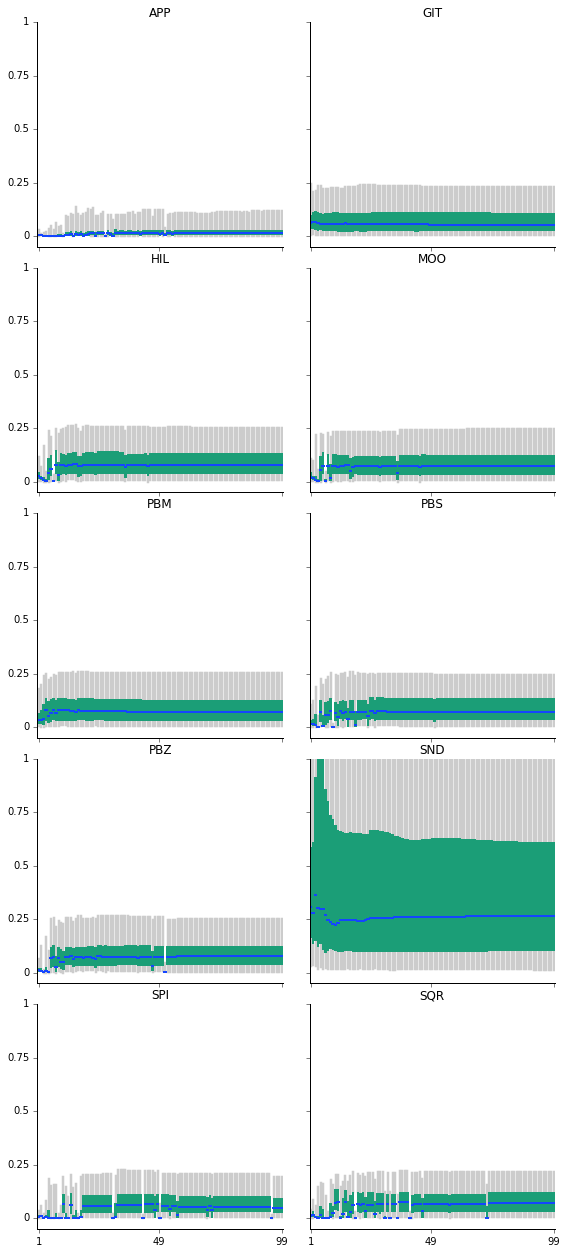

In [59]:
technique_list = Parser.list_techniques()
nrow = 5
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
fig.tight_layout()
for i, ax in enumerate(fig.axes):
    if i == 10:
        break
        
    ax.set_title(technique_list[i].upper())

    data = []
    history = Parser.parse_rectangles(technique_list[i], dataset_id)
    for i in range(1, len(history)):
        df = TemporalMetrics.delta_vis(history[i - 1], history[i])
        df = pd.merge(df, TemporalMetrics.delta_data_by_area(history[i - 1], history[i]), left_index=True, right_index=True)
        df = pd.merge(df, TemporalMetrics.relative_weight(history[i - 1], history[i]), left_index=True, right_index=True)
        
        df['delta_data'] = df['delta_data'] * K
        df['delta_data'] = df['delta_data'].clip(0,1)
        
        df_stab = TemporalMetrics.q_ratio(df)
        data.append(df_stab.values)

    bp = ax.boxplot(data, whis=[5, 95], showfliers=False, patch_artist=True, widths=1);
    
    ax.set_ylim(ymin=-0.05, ymax=1)
    ax.set_yticks([0, .25, .5, .75, 1], minor=False)
    ax.set_yticklabels([0, .25, .5, .75, 1], fontdict=None, minor=False)
    styleBoxplot(bp, ax, len(data))

# # fig.savefig('time/svg/' + dataset_id + '_stab.svg', format='svg', dpi=1200)

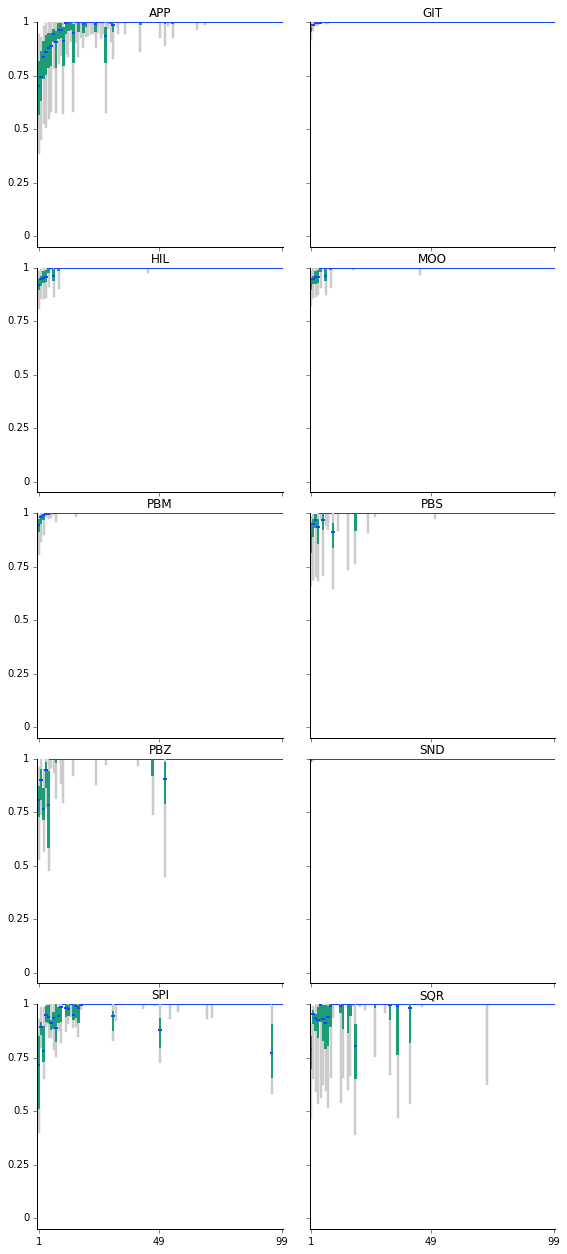

In [60]:
technique_list = Parser.list_techniques()
nrow = 5
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
fig.tight_layout()
for i, ax in enumerate(fig.axes):
    if i == 10:
        break
        
    ax.set_title(technique_list[i].upper())

    data = []
    history = Parser.parse_rectangles(technique_list[i], dataset_id)
    for i in range(1, len(history)):
        df = TemporalMetrics.delta_vis(history[i - 1], history[i])
        df = pd.merge(df, TemporalMetrics.delta_data_by_area(history[i - 1], history[i]), left_index=True, right_index=True)
        df = pd.merge(df, TemporalMetrics.relative_weight(history[i - 1], history[i]), left_index=True, right_index=True)
        
#         df['delta_data'] = df['delta_data'] * K
#         df['delta_data'] = df['delta_data'].clip(0,1)
        
        df_stab = TemporalMetrics.q_1_minus_ratio(df)
        data.append(df_stab.values)

    bp = ax.boxplot(data, whis=[5, 95], showfliers=False, patch_artist=True, widths=1);
    
    ax.set_ylim(ymin=-0.05, ymax=1)
    ax.set_yticks([0, .25, .5, .75, 1], minor=False)
    ax.set_yticklabels([0, .25, .5, .75, 1], fontdict=None, minor=False)
    styleBoxplot(bp, ax, len(data))

# # fig.savefig('time/svg/' + dataset_id + '_stab.svg', format='svg', dpi=1200)

In [61]:
# history = Parser.parse_rectangles('snd', dataset_id)
# #for i in range(1, len(history)):
# i = 20
# df = TemporalMetrics.delta_vis(history[i - 1], history[i])
# df = pd.merge(df, TemporalMetrics.delta_data_by_area(history[i - 1], history[i]), left_index=True, right_index=True)
# df = pd.merge(df, TemporalMetrics.relative_weight(history[i - 1], history[i]), left_index=True, right_index=True)

# df['delta_data'] = df['delta_data'] * K
# df['delta_data'] = df['delta_data'].clip(0,1)

# df_stab = TemporalMetrics.q_ratio(df)
# df

In [62]:
# M = 2  # Number of metrics

# technique_list = Parser.list_techniques()
# nrow = 6
# ncol = 2
# fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
# fig.tight_layout()
# for i, ax in enumerate(fig.axes):
#     ax.set_title(technique_list[i].upper())
#     statistics_list = []  # 5%, first quartile, median, third quartile, 95% statistics lists


#     history = Parser.parse_rectangles(technique_list[i], dataset_id)
#     for i in range(1, len(history)):
#         df = TemporalMetrics.delta_vis(history[i - 1], history[i])
#         df = pd.merge(df, TemporalMetrics.delta_data_by_area(history[i - 1], history[i]), left_index=True, right_index=True)
#         df = pd.merge(df, TemporalMetrics.relative_weight(history[i - 1], history[i]), left_index=True, right_index=True)
#         N = len(df)

#         df['delta_data'] = df['delta_data'] * K
#         df['delta_data'] = df['delta_data'].clip(0,1)
#         TemporalMetrics.q_ratio(df)
#         df_w = df.copy()

#         df = df.assign(weight = pd.Series(1 /(N * M), index=df.index))

#         df_w = df_w.assign(weight = pd.Series(df_w['weight'] / M, index=df.index))

#         df_rev = pd.concat([df, df_w]) 
        
# #         print(df_rev['weight'].sum())  # Sum is 1    
# #         print(df_rev['weight'])    
        
#         df_rev = df_rev.sort_values(by='q_ratio')
#         df_rev['weight'] = df_rev['weight'].cumsum()
        
        
#             # 5%, first quartile, median, third quartile, 95%
#         f = fq = median = tq = nf = float("nan") 
#         for i, row in df_rev.iterrows():
#             if row['weight'] >= 0.05 and math.isnan(f):
#                 f = row['q_ratio']
#             if row['weight'] >= 0.25 and math.isnan(fq):
#                 fq = row['q_ratio']
#             if row['weight'] >= 0.5 and math.isnan(median):
#                 median = row['q_ratio']
#             if row['weight'] >= 0.75 and math.isnan(tq):
#                 tq = row['q_ratio']
#             if row['weight'] >= 0.95 and math.isnan(nf):
#                 nf = row['q_ratio']
            
#         item = {}
#         item["med"] = median
#         item["q1"] = fq
#         item["q3"] = tq
#         item["whislo"] = f
#         item["whishi"] = nf
#         item["fliers"] = []
#         statistics_list.append(item)

        

#     bp = ax.bxp(statistics_list, patch_artist=True, widths=1);
#     styleBoxplot(bp, ax, len(history))    

#     ax.set_ylim(ymin=-0.05)
#     ax.set_yticks([0, .25, .5, .75, 1], minor=False)
#     ax.set_yticklabels([0, .25, .5, .75, 1], fontdict=None, minor=False)
    
# # # fig.savefig('time/svg/' + dataset_id + '_stab.svg', format='svg', dpi=1200)

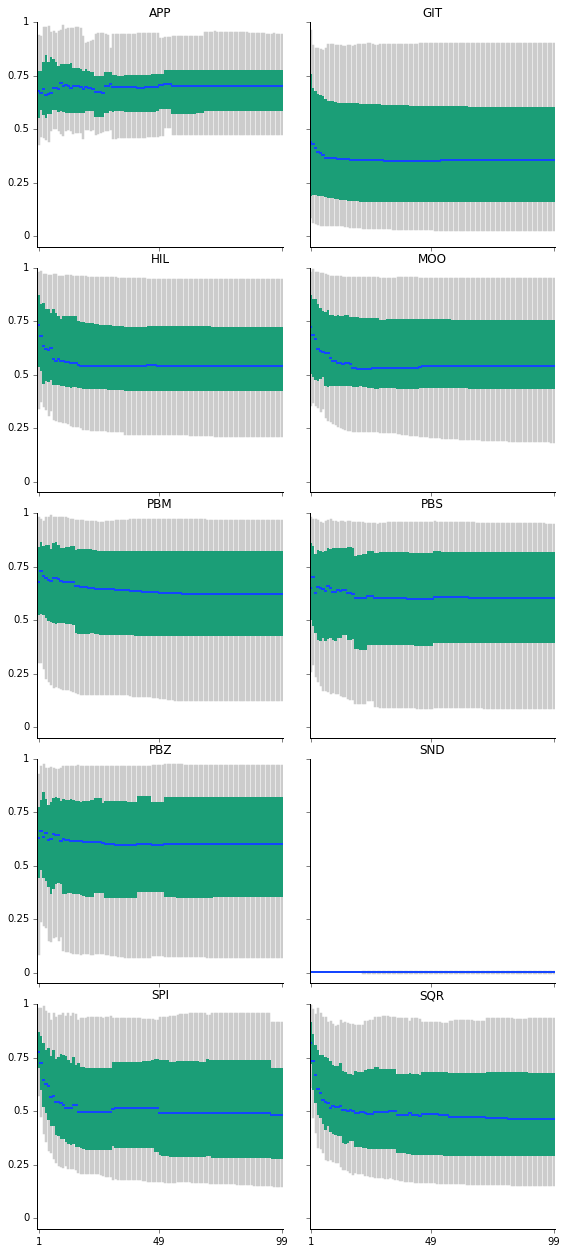

In [63]:
technique_list = Parser.list_techniques()
nrow = 5
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
fig.tight_layout()
for i, ax in enumerate(fig.axes):
    if i == 10:
        break
        
    ax.set_title(technique_list[i].upper())

    data = []
    history = Parser.parse_rectangles(technique_list[i], dataset_id)
    for i in range(1, len(history)):
        df = SpatialMetrics.q_ar(history[i])
        data.append(df['q_ar'].values)

    bp = ax.boxplot(data, whis=[5, 95], showfliers=False, patch_artist=True, widths=1);
    
    ax.set_ylim(ymin=-0.05, ymax=1)
    ax.set_yticks([0, .25, .5, .75, 1], minor=False)
    ax.set_yticklabels([0, .25, .5, .75, 1], fontdict=None, minor=False)
    styleBoxplot(bp, ax, len(data))

# # fig.savefig('time/svg/' + dataset_id + '_stab.svg', format='svg', dpi=1200)